# Who Do You Love?
Are Americans dog people or cat people?

An analysis of cats and dogs in the United States, from a publicly available dataset obtained from Kaggle.

This is my first attempt at my own data analysis project. I've compeleted some guided projects on DataCamp, and wanted to see how well I could do one on my own. I am, however, still a beginner.

This analysis will attempt to answer some questions about this dataset. 
1. What states have the most dog-owner households? What states have the most cat-owner households?
2. What is the total dog and cat population by state?
3. What is the total dog and cat population of the entire USA?
4. What portion of households are pet-less households, cat-only households, dog-only households, and dog and cat households?
5. Do Americans show a preference for one pet over the other?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pets = pd.read_csv('cats_and_dogs.csv')

## EDA
First I'll take a look at the dataset in order to see what information is in the rows and columns, and look for any missing values

In [2]:
pets.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [3]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              49 non-null     int64  
 1   state                   49 non-null     object 
 2   n_households            49 non-null     int64  
 3   percent_pet_households  49 non-null     float64
 4   n_pet_households        49 non-null     int64  
 5   percent_dog_owners      49 non-null     float64
 6   n_dog_households        49 non-null     int64  
 7   avg_dogs_per_household  49 non-null     float64
 8   dog_population          49 non-null     int64  
 9   percent_cat_owners      49 non-null     float64
 10  n_cat_households        49 non-null     int64  
 11  avg_cats_per_household  49 non-null     float64
 12  cat_population          49 non-null     int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 5.1+ KB


Luckily, no missing values 

In [4]:
pets.describe()

,Unnamed: 0,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,2403.897959,56.859184,1342.591837,36.973469,876.367347,1.587755,1414.163265,31.642857,728.061224,2.040816,1492.795918
std,14.28869,2514.054786,6.931688,1358.247246,6.671169,891.828475,0.202724,1464.658882,5.683162,717.293362,0.191397,1459.857969
min,1.00000,221.000000,21.900000,63.000000,13.100000,38.000000,1.100000,42.000000,11.600000,33.000000,1.700000,63.000000
25%,13.00000,765.000000,53.600000,475.000000,32.900000,273.000000,1.400000,410.000000,29.000000,247.000000,1.900000,514.000000
50%,25.00000,1759.000000,56.800000,957.000000,36.600000,638.000000,1.600000,1097.000000,31.300000,501.000000,2.000000,1185.000000
75%,37.00000,2632.000000,61.300000,1611.000000,42.500000,1069.000000,1.700000,1798.000000,33.800000,876.000000,2.200000,1844.000000
max,49.00000,12974.000000,70.800000,6865.000000,47.900000,4260.000000,2.100000,7163.000000,49.500000,3687.000000,2.600000,7118.000000


## Question 1
Which states own the most dogs? Which states own the most cats?

I will sort the rows based on the 'percent_dog_owners' columns in order to rank order the top dog-owning states.
I'll do the same with the 'percent_cat_owners' column.

In [5]:
top_dog_states = pets.sort_values('percent_dog_owners', ascending=False).drop(index=pets.index[10:])
top_dog_states

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191
9,10,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
8,9,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63


In [6]:
top_cat_states = pets.sort_values('percent_cat_owners', ascending=False).drop(index=pets.index[10:])
top_cat_states

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
8,9,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375
9,10,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63


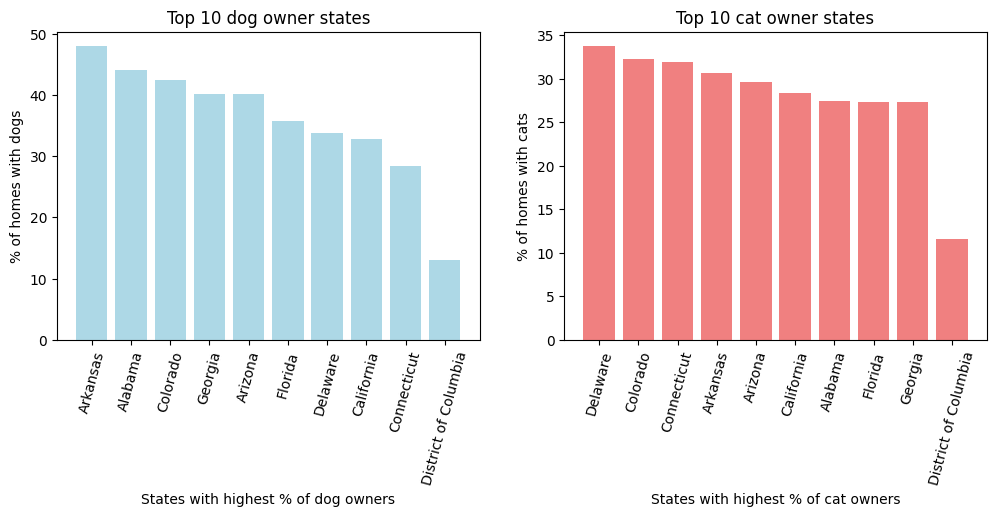

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].bar(top_dog_states['state'], top_dog_states['percent_dog_owners'], color='lightblue')
ax[0].set_title('Top 10 dog owner states')
ax[0].set_xticklabels(top_dog_states['state'], rotation=75)
ax[0].set_xlabel('States with highest % of dog owners')
ax[0].set_ylabel('% of homes with dogs')

ax[1].bar(top_cat_states['state'], top_cat_states['percent_cat_owners'], color='lightcoral')
ax[1].set_title('Top 10 cat owner states')
ax[1].set_xticklabels(top_cat_states['state'], rotation=75)
ax[1].set_xlabel('States with highest % of cat owners')
ax[1].set_ylabel('% of homes with cats')

plt.show()

Answer to Question 1: The graph shown above provides the top 10 dog-owning and cat-owning states in the USA. Dog-owner states have higher percentages of dog homes, than the cat-owner states. 

## Question 2
What is the total dog and cat population by state, and nationwide?

First, I'll sort the states by dog population.
Then I'll do the same thing for cat population.

In [8]:
dog_sorted = pets.sort_values('dog_population')
display(dog_sorted.head())

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63
48,49,Wyoming,221,61.8,137,38.8,86,1.5,125,33.9,75,1.9,144
32,33,North Dakota,272,53.9,147,36.1,98,1.4,139,31.4,85,2.0,174
43,44,Vermont,265,70.8,188,37.7,100,1.4,142,49.5,131,1.8,234
37,38,Rhode Island,434,53.0,230,29.3,127,1.3,161,27.6,120,1.8,212


In [9]:
cat_sorted = pets.sort_values('cat_population')
cat_sorted.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63
48,49,Wyoming,221,61.8,137,38.8,86,1.5,125,33.9,75,1.9,144
32,33,North Dakota,272,53.9,147,36.1,98,1.4,139,31.4,85,2.0,174
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
37,38,Rhode Island,434,53.0,230,29.3,127,1.3,161,27.6,120,1.8,212


Now, I'll create a horizontal bar plot with state as Y-axis, and dog/cat populations on the X-axis.

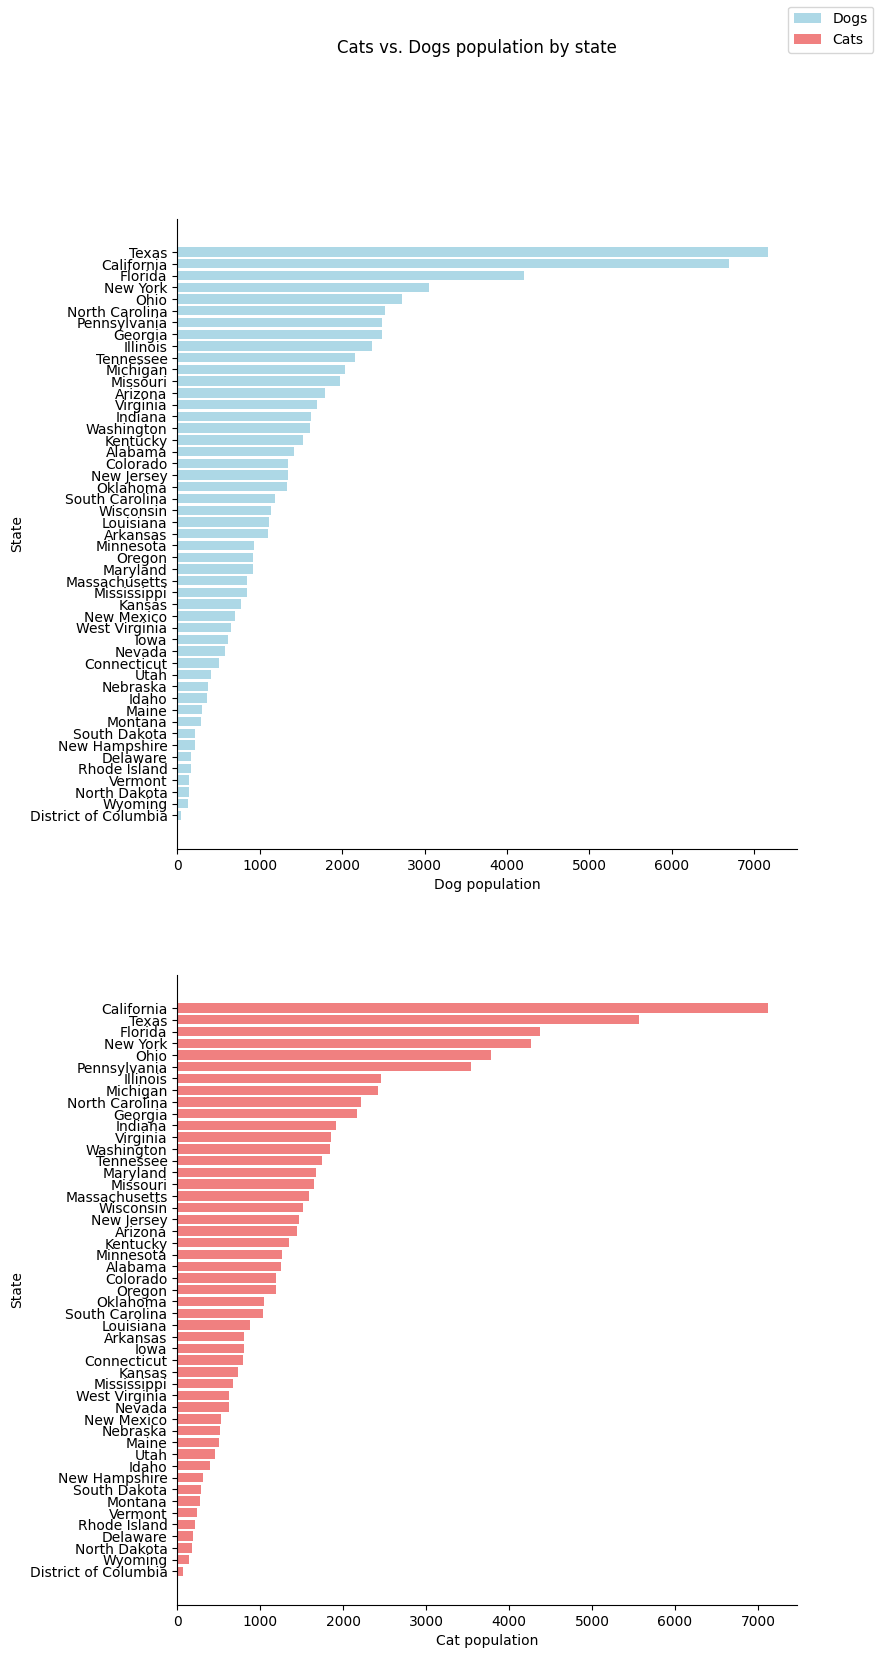

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 18))
ax1.barh(dog_sorted['state'], dog_sorted['dog_population'], color='lightblue', align='center', label='Dogs')
ax2.barh(cat_sorted['state'], cat_sorted['cat_population'], color='lightcoral', align='center', label='Cats')
ax1.set_xlabel('Dog population')
ax2.set_xlabel('Cat population')
ax1.set_ylabel('State')
ax2.set_ylabel('State')
fig.suptitle('Cats vs. Dogs population by state')
ax1.spines[['top', 'right']].set_visible(False)
ax2.spines[['top', 'right']].set_visible(False)
fig.legend()

plt.show()

Answer to Question 2: I tried to offset the bars for cats and dogs, but they still overlap somewhat. So far, I can't figure out how to completely correct that, but the graph above is enough effectively visualize the populations of each pet by state. California and Texas clearly own more cats and dogs than the other states. And this makes sense since they are two highly populated states (with humans). Since my graph with both pets on the same figure didn't really look good, I just put them each on its own axis. I couldn't ever get the bars offset enough. Plus, with 50 states, it looked rather crowded and messy.

Another good question to answer would be to analyze pet owning data based on human population density. As in, does human population density have any correlation with pet ownership?

## Question 3
What is the total dog and cat population of the entire USA?

First I'll create new variables from the pets dataframe which consolidate each state's dog and cat populations in order to calculate each pet population for the entire USA

In [11]:
dogs_usa = pets['dog_population'].sum()
dogs_usa

69294

In [12]:
cats_usa = pets['cat_population'].sum()
cats_usa

73147

I'll try to make a new dataframe with just the usa-level cats and dogs population because I don't know how else to make a graph to visualize this. In the ax.bar arguments, I don't know what to put in the X-axis with the current dataframe.

In [13]:
df_usa = pd.DataFrame({'total_pop': [dogs_usa, cats_usa]}, index=['dogs_usa', 'cats_usa'])
df_usa

,total_pop
dogs_usa,69294
cats_usa,73147


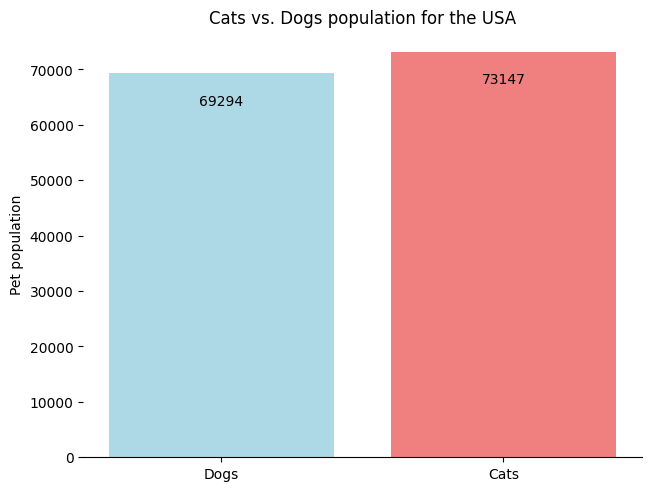

In [14]:
fig, ax = plt.subplots(layout='constrained')
bars = ax.bar(df_usa.index, df_usa['total_pop'], color=['lightblue', 'lightcoral'], label=['Dogs', 'Cats'])
ax.set_xticklabels(['Dogs', 'Cats'])
ax.set_ylabel('Pet population')
ax.set_title('Cats vs. Dogs population for the USA')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.bar_label(bars, padding=-25)

plt.show()

Answer to Question 3: There are 73,147 cats in the USA, and 69,294 dogs. I would have guessed there were more dogs in this country than cats.

## Question 4
What portion of households are pet-less households, cat-only households, dog-only households, and dog and cat households?

% pet households, % dog households, and % cat households are already in the dataframe. So I'll create another column in the dataframe for pet-less households

In [15]:
pets['percent_petless'] = ((pets['n_households'] - pets['n_pet_households']) / pets['n_households'] * 100).round(1)
pets['percent_petless'].head()

0    40.5
1    40.5
2    37.6
3    47.1
4    38.7
Name: percent_petless, dtype: float64

In [16]:
pets.head(10)

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,percent_petless
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252,40.5
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438,40.5
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810,37.6
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118,47.1
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191,38.7
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,45.5
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187,43.4
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63,78.0
8,9,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375,45.6
9,10,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162,44.9


Now, I'll check to make sure those percentages all add up to 100%

In [17]:
pets[(pets['percent_petless'] + pets['percent_pet_households'] != 100)]

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,percent_petless
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,45.5
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63,78.0
13,14,Iowa,1219,53.6,654,33.4,407,1.5,610,30.3,370,2.2,805,46.3
17,18,Maine,548,62.9,345,34.6,190,1.6,300,46.4,254,1.9,498,37.0
19,20,Massachusetts,2618,50.4,1318,23.6,618,1.4,850,34.1,892,1.8,1593,49.7
24,25,Montana,410,61.3,251,41.2,169,1.7,282,33.6,138,2.0,277,38.8
27,28,New Hampshire,508,56.8,289,30.3,154,1.4,212,34.2,174,1.8,309,43.1
29,30,New Mexico,773,67.6,523,46.0,356,2.0,703,32.0,247,2.2,533,32.3
32,33,North Dakota,272,53.9,147,36.1,98,1.4,139,31.4,85,2.0,174,46.0
34,35,Oklahoma,1479,58.9,872,43.2,638,2.1,1327,32.6,482,2.2,1041,41.0


oops

In [18]:
pets['percent_households'] = pets['percent_pet_households'] + pets['percent_petless']
pets[(pets['percent_petless'] + pets['percent_pet_households'] != 100)]

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,percent_petless,percent_households
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,45.5,99.9
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63,78.0,99.9
13,14,Iowa,1219,53.6,654,33.4,407,1.5,610,30.3,370,2.2,805,46.3,99.9
17,18,Maine,548,62.9,345,34.6,190,1.6,300,46.4,254,1.9,498,37.0,99.9
19,20,Massachusetts,2618,50.4,1318,23.6,618,1.4,850,34.1,892,1.8,1593,49.7,100.1
24,25,Montana,410,61.3,251,41.2,169,1.7,282,33.6,138,2.0,277,38.8,100.1
27,28,New Hampshire,508,56.8,289,30.3,154,1.4,212,34.2,174,1.8,309,43.1,99.9
29,30,New Mexico,773,67.6,523,46.0,356,2.0,703,32.0,247,2.2,533,32.3,99.9
32,33,North Dakota,272,53.9,147,36.1,98,1.4,139,31.4,85,2.0,174,46.0,99.9
34,35,Oklahoma,1479,58.9,872,43.2,638,2.1,1327,32.6,482,2.2,1041,41.0,99.9


After observing the values of the 'percent_households' column that do not equal 100, they are within 99.9 to 100.1 so no big deal I think. I'll keep that column.

Now lets see if I can calculate multi-pet households. Its very possible I'll do it wrong. I will add up the percentages of cat households, dog households, and pet households. The remainder over 100 should be the percentage of multi-pet households. I hope

In [19]:
pets['percent_multi_pet'] = (pets['percent_pet_households'] + 
                             pets['percent_dog_owners'] + 
                             pets['percent_cat_owners']) - 100

pets[pets['percent_multi_pet'] < 0]

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,percent_petless,percent_households,percent_multi_pet
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63,78.0,99.9,-53.4


Something is off with the District of Columbia row. The total percent pet households is less than the sum of percent dogs households and percent cat households. And the 3 of those columns don't go beyond 100%. I will drop the D.C. row for my next graph.

In [20]:
pets = pets.drop(index=[7])

In [21]:
pets['pet_totals'] = pets['percent_multi_pet'] + \
                     pets['percent_dog_owners'] + \
                     pets['percent_cat_owners'] + \
                     pets['percent_petless']
            
pets

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,percent_petless,percent_households,percent_multi_pet,pet_totals
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252,40.5,100.0,31.0,143.0
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438,40.5,100.0,29.2,139.4
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810,37.6,100.0,40.9,157.0
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118,47.1,100.0,14.0,122.2
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191,38.7,100.0,36.1,149.6
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,45.5,99.9,14.6,120.3
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187,43.4,100.0,24.0,134.8
8,9,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375,45.6,100.0,17.4,126.0
9,10,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162,44.9,100.0,22.5,134.8
10,11,Idaho,568,62.0,352,42.7,242,1.5,357,34.6,196,2.0,393,38.0,100.0,39.3,154.6


The 'pet_totals' columns go far over 100 so I didn't do that part correctly. I want to make a pie graph of my four categories, so now I think I will sum up cat owners, dog owners, and petless households in order to use the remainder under 100 as the multipet category. 

In [22]:
pets = pets.drop(columns=['percent_multi_pet', 'pet_totals'])
pets

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,percent_petless,percent_households
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252,40.5,100.0
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438,40.5,100.0
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810,37.6,100.0
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118,47.1,100.0
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191,38.7,100.0
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,45.5,99.9
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187,43.4,100.0
8,9,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375,45.6,100.0
9,10,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162,44.9,100.0
10,11,Idaho,568,62.0,352,42.7,242,1.5,357,34.6,196,2.0,393,38.0,100.0


In [23]:
pets['multi_pet'] = pets['n_dog_households'] + pets['n_cat_households'] - pets['n_pet_households'] 

pets

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,percent_petless,percent_households,multi_pet
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252,40.5,100.0,220
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438,40.5,100.0,254
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810,37.6,100.0,185
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118,47.1,100.0,1082
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191,38.7,100.0,270
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,45.5,99.9,78
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187,43.4,100.0,37
8,9,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375,45.6,100.0,659
9,10,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162,44.9,100.0,466
10,11,Idaho,568,62.0,352,42.7,242,1.5,357,34.6,196,2.0,393,38.0,100.0,86


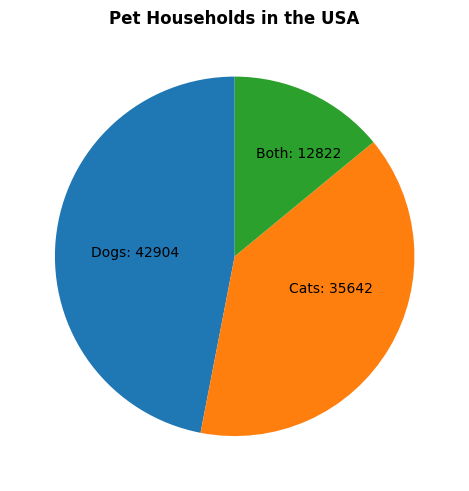

In [33]:
pets_sum = pets[['n_dog_households', 'n_cat_households', 'multi_pet']].sum()

plt.figure(layout='constrained')  
plt.pie(pets_sum, startangle=90)
plt.title('Pet Households in the USA', fontweight='bold')
plt.text(-0.8, 0, f'Dogs: {pets_sum["n_dog_households"]}')
plt.text(0.3, -0.2, f'Cats: {pets_sum["n_cat_households"]}')
plt.text(0.12, 0.55, f'Both: {pets_sum["multi_pet"]}')

plt.show()

# Conclusions

The population of cats in the USA is higher than dogs, as shown in visualization from Question 3.

But there are more dog households than cat households as shown in visualization from Question 4. And by a considerable margin it seems. 

A good follow up to this analysis would be to see if these differences are statistically significant.

Question 5. Do Americans show a preference for one pet over the other?
I guess it depends (sorry). 

With absolute numbers of individuals, cats seem to be favored over dogs. So possibly cat households have more cats than dog households have dogs. A brief look at the pets dataframe would suggest this is true, however more pandas analysis would confirm that. I worry this analysis is already quite long, so I'll leave that for another time.

For households with pets, there are far more dog households than cat households. 

So overall, it seems that more Americans are dog people, but the cat people are truly crazy cat folks.

Notes:

I realize this analysis is rather messy and disorganized. But I am very happy with the amount I learned as I worked through this project. As I did my research throughout this project, I discovered some really smart people and I'm grateful for the opportunity to learn from them. I hope to continue improving.

# Sources

https://www.kaggle.com/datasets/sujaykapadnis/cats-vs-dogs

https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib

https://matplotlib.org/stable/users/explain/axes/axes_intro.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

https://towardsdatascience.com/7-steps-to-help-you-make-your-matplotlib-bar-charts-beautiful-f87419cb14cb

https://www.kaggle.com/code/sergiykobtsev/cats-dogs-households

VanderPlas, Jake. _Python Data Science Handbook_. Chapters 15, 17, 31.